# 1. Closing price for data

[*********************100%%**********************]  1 of 1 completed
            Date        Open        High         Low       Close   Adj Close  \
0     2013-01-02   97.599998   99.900002   97.099998   99.599998   72.426743   
1     2013-01-03  100.500000  102.000000  100.000000  101.000000   73.444786   
2     2013-01-04  100.500000  101.500000  100.000000  101.500000   73.808395   
3     2013-01-07  101.000000  101.000000   99.099998  100.500000   73.081215   
4     2013-01-08   99.599998  100.000000   98.900002   99.699997   72.499474   
...          ...         ...         ...         ...         ...         ...   
2655  2023-11-21  582.000000  585.000000  581.000000  585.000000  585.000000   
2656  2023-11-22  576.000000  579.000000  574.000000  577.000000  577.000000   
2657  2023-11-23  574.000000  578.000000  574.000000  578.000000  578.000000   
2658  2023-11-24  577.000000  578.000000  574.000000  575.000000  575.000000   
2659  2023-11-27  573.000000  577.000000  568.00000

Text(0.5, 1.0, 'Closing price for data')

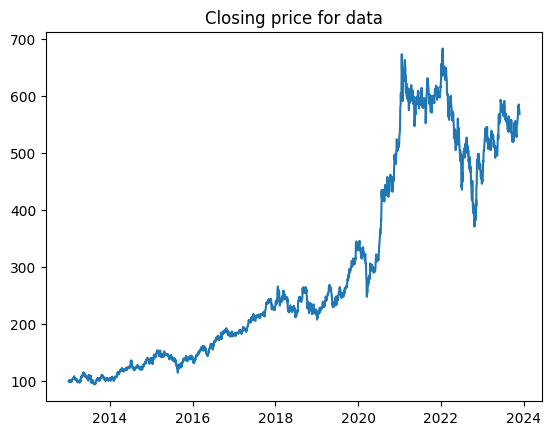

In [1]:
#  pip install yfinance
import yfinance as yf
import csv
# Using yfinance to Download Financial Data 
tsmc2022 = yf.download("2330.TW", start = '2013-01-01')
tsmc2022.to_csv('tsmc2013_2023.csv')

# tsmc2022.csv From 2013-01-01 to Today
import pandas as pd
df =pd.read_csv('./tsmc2013_2023.csv')
print(df)
df = df[['Date','Close']]
print(df)
print(df['Date'])

import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2013-01-02')

df['Date'] = df['Date'].apply(str_to_datetime)

df.index = df.pop('Date')
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close'])
plt.title("Closing price for data")

In [1]:
# Using plotly module to present Time Series via date
import plotly.graph_objects as go

import pandas as pd
df = pd.read_csv("./tsmc2023.csv")
fig = go.Figure([go.Scatter(x=df['Date'], y=df['Close'])])
fig.show()

# 2. Present Volume via Bar Graph

In [5]:
import plotly.express as px
import pandas as pd
df = pd.read_csv("./tsmc2023.csv")
fig = px.bar(df, x=df['Date'], y=df['Volume'])
fig.show()

In [6]:
import plotly.graph_objects as go
import pandas as pd
df = pd.read_csv("./tsmc2023.csv")
fig = go.Figure()
fig.add_trace(go.Bar(x=df['Date'], y=df['Volume']))
fig.show()

# 3. Moving Average 

5-day moving average

In [2]:
import pandas as pd
# importing time-series data
movingAverages = pd.read_csv('tsmc2013_2023.csv', index_col='Date', parse_dates=True)
# printing dataFrame
display(movingAverages.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,97.599998,99.900002,97.099998,99.599998,72.426743,40527000
2013-01-03,100.500000,102.000000,100.000000,101.000000,73.444786,44107000
2013-01-04,100.500000,101.500000,100.000000,101.500000,73.808395,39278000
2013-01-07,101.000000,101.000000,99.099998,100.500000,73.081215,40288000
2013-01-08,99.599998,100.000000,98.900002,99.699997,72.499474,31090000


In [3]:
# Mathematical calculations 
import numpy as np
# updating our dataFrame to have only one column 'Close' as rest all columns are of no use for us at the moment using .to_frame() to convert pandas series into dataframe.
movingAverages = movingAverages['Close'].to_frame()
# calculating simple moving average using .rolling(window).mean() , with window size = 5
movingAverages['SMA5'] = movingAverages['Close'].rolling(5).mean()
# removing all the NULL values using dropna() method
movingAverages.dropna(inplace=True)
# printing Dataframe
display(movingAverages)

,Close,SMA5
Date,,
2013-01-08,99.699997,100.459999
2013-01-09,100.000000,100.539999
2013-01-10,101.000000,100.539999
2013-01-11,101.000000,100.439999
2013-01-14,102.000000,100.739999
...,...,...
2023-11-21,585.000000,581.200000
2023-11-22,577.000000,580.400000
2023-11-23,578.000000,579.400000


Text(0.5, 1.0, '5-day moving average')

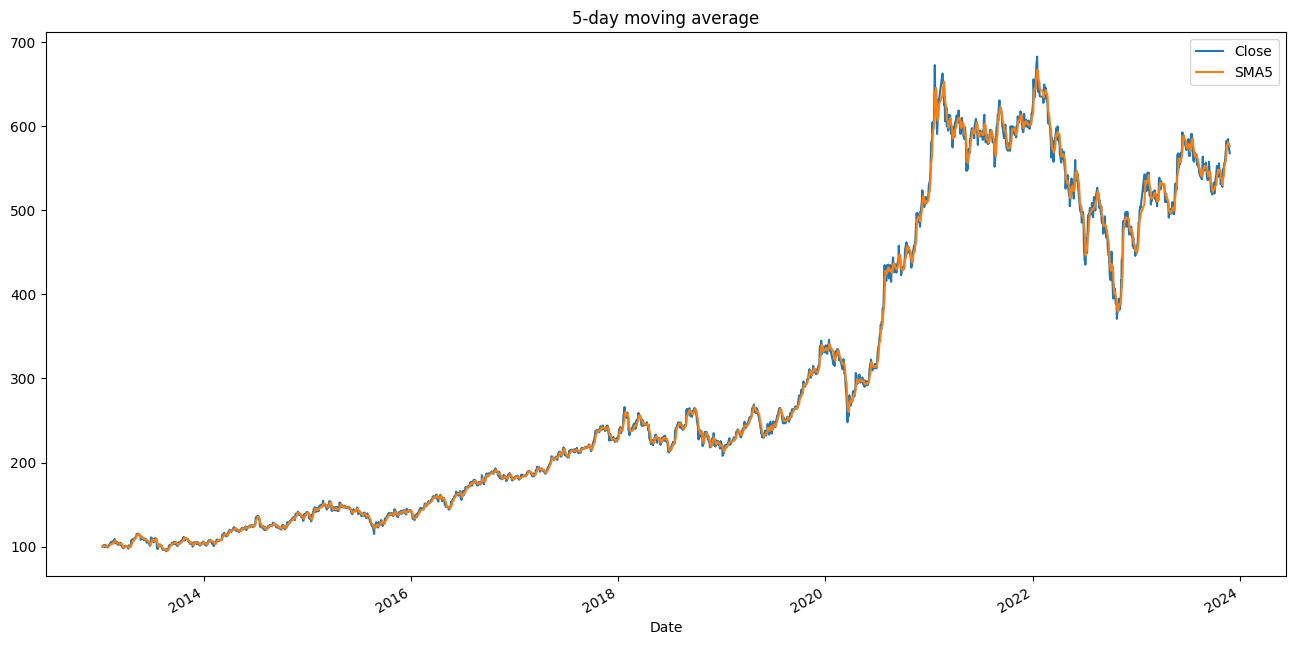

In [4]:
# plotting graphs
import matplotlib.pyplot as plt
movingAverages[['Close', 'SMA5']].plot(label='RELIANCE',figsize=(16,8))
plt.title("5-day moving average")

10-day moving average

,Close,SMA5,SMA10
Date,,,
2013-01-21,100.500000,100.200000,100.47
2013-01-22,101.000000,100.300000,100.60
2013-01-23,101.000000,100.660001,100.70
2013-01-24,99.900002,100.780000,100.59
2013-01-25,99.000000,100.280000,100.39
...,...,...,...
2023-11-21,585.000000,581.200000,571.90
2023-11-22,577.000000,580.400000,574.00
2023-11-23,578.000000,579.400000,576.10


Text(0.5, 1.0, '10-day moving average')

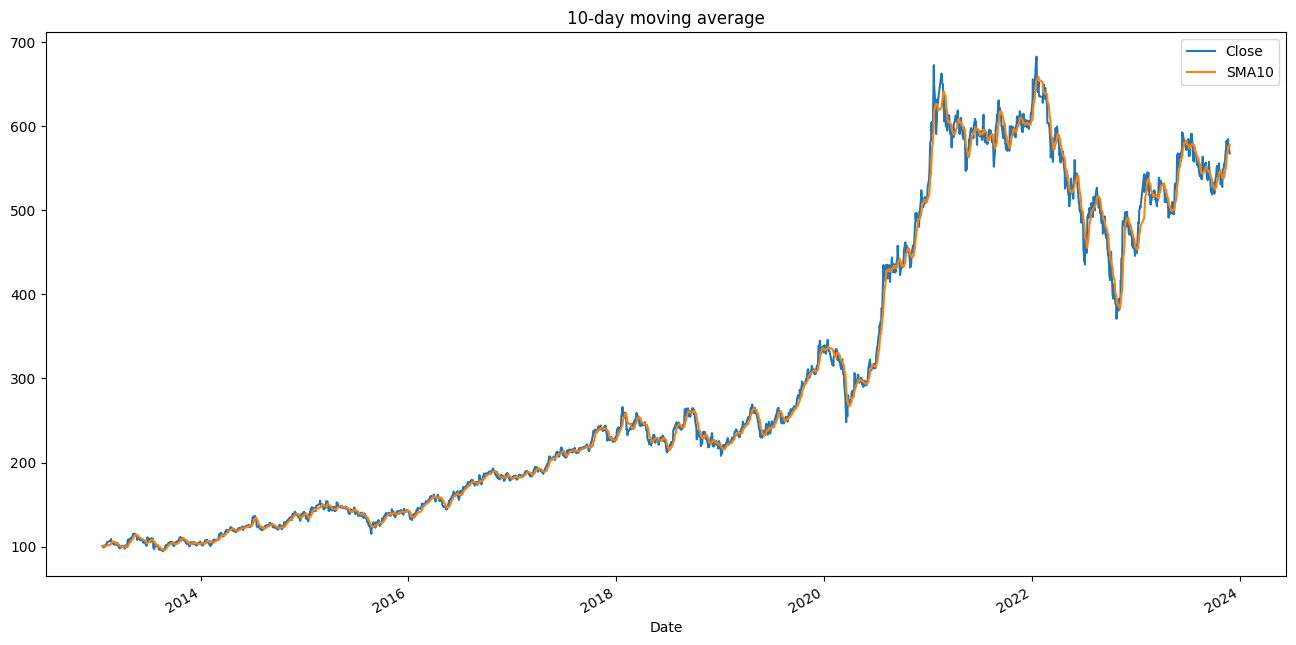

In [5]:
# calculating simple moving average using .rolling(window).mean() , with window size = 10
movingAverages['SMA10'] = movingAverages['Close'].rolling(10).mean()
# removing all the NULL values using dropna() method
movingAverages.dropna(inplace=True)
# printing Dataframe
display(movingAverages)
# plotting graphs
import matplotlib.pyplot as plt
movingAverages[['Close', 'SMA10']].plot(label='RELIANCE',figsize=(16,8))
plt.title("10-day moving average")

20-day moving average

,Close,SMA5,SMA10,SMA20
Date,,,,
2013-02-26,103.5,106.0,105.50,103.060
2013-02-27,104.5,105.1,105.65,103.260
2013-03-01,105.0,104.7,105.85,103.460
2013-03-04,102.0,104.0,105.55,103.510
2013-03-05,104.0,103.8,105.25,103.715
...,...,...,...,...
2023-11-21,585.0,581.2,571.90,555.850
2023-11-22,577.0,580.4,574.00,557.500
2023-11-23,578.0,579.4,576.10,559.850


Text(0.5, 1.0, '20-day moving average')

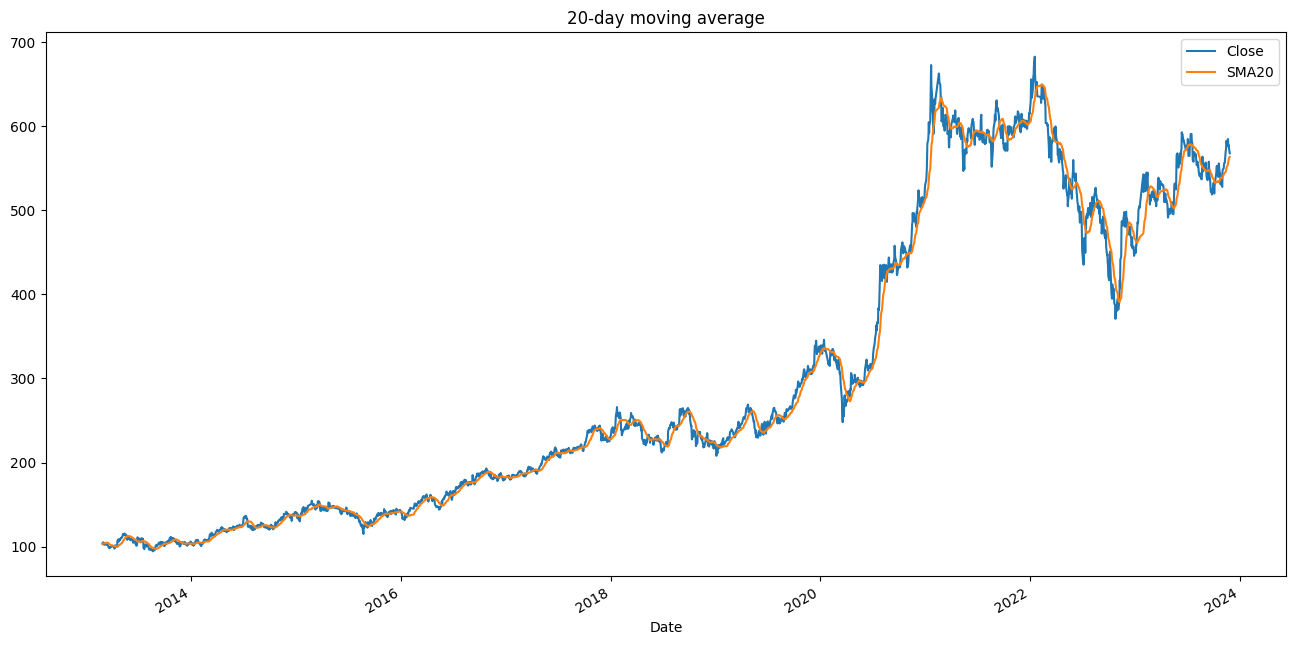

In [6]:
# calculating simple moving average using .rolling(window).mean() , with window size = 20
movingAverages['SMA20'] = movingAverages['Close'].rolling(20).mean()
# removing all the NULL values using dropna() method
movingAverages.dropna(inplace=True)
# printing Dataframe
display(movingAverages)
# plotting graphs
import matplotlib.pyplot as plt
movingAverages[['Close', 'SMA20']].plot(label='RELIANCE',figsize=(16,8))
plt.title("20-day moving average")

60-day moving average

,Close,SMA5,SMA10,SMA20,SMA60
Date,,,,,
2013-05-24,109.5,111.2,112.80,112.125,105.260000
2013-05-27,112.0,110.8,112.55,112.300,105.401667
2013-05-28,109.5,110.2,111.95,112.375,105.485000
2013-05-29,111.0,110.0,111.55,112.450,105.585000
2013-05-30,110.0,110.4,111.20,112.425,105.718333
...,...,...,...,...,...
2023-11-21,585.0,581.2,571.90,555.850,545.850000
2023-11-22,577.0,580.4,574.00,557.500,546.366667
2023-11-23,578.0,579.4,576.10,559.850,546.850000


Text(0.5, 1.0, '60-day moving average')

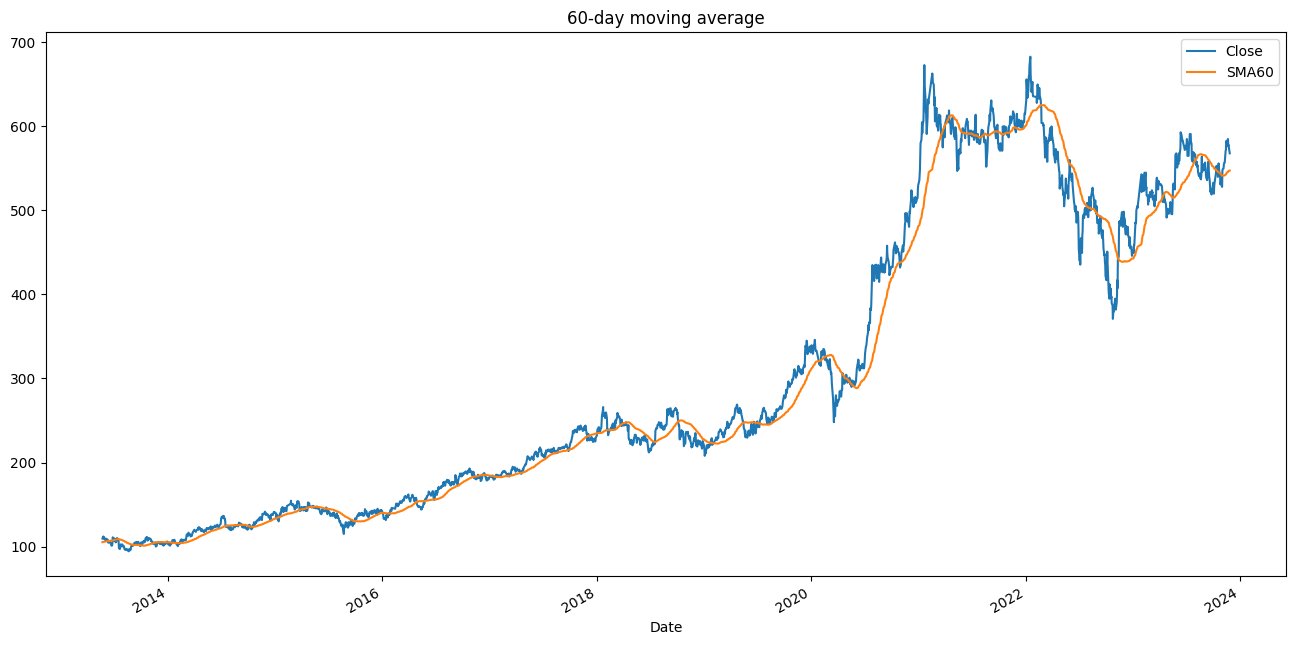

In [7]:
# calculating simple moving average using .rolling(window).mean() , with window size = 60
movingAverages['SMA60'] = movingAverages['Close'].rolling(60).mean()
# removing all the NULL values using dropna() method
movingAverages.dropna(inplace=True)
# printing Dataframe
display(movingAverages)
# plotting graphs
import matplotlib.pyplot as plt
movingAverages[['Close', 'SMA60']].plot(label='RELIANCE',figsize=(16,8))
plt.title("60-day moving average")

# 4. Candlestick Chart 

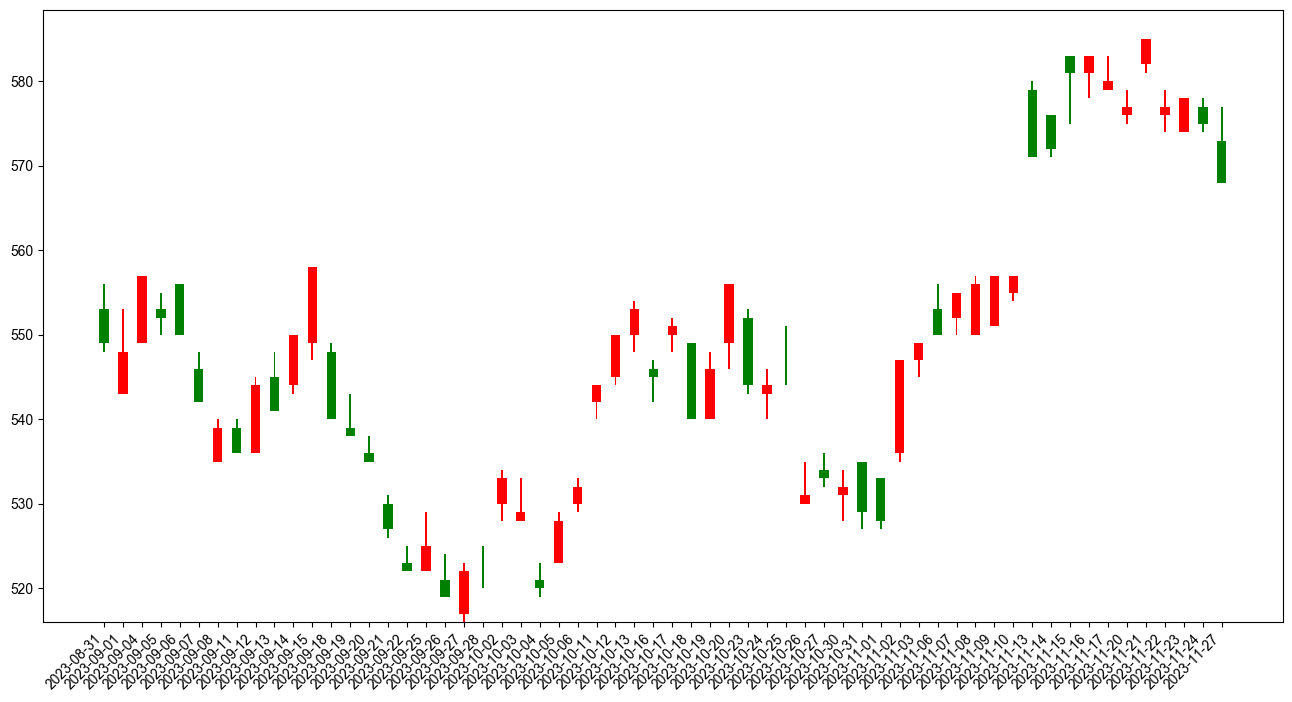

In [3]:
# Using matplotlib to show Candlestick Chart
import matplotlib.pyplot as plt
# plt.rc("font", family="Microsoft JhengHei")  # 微軟正黑體
plt.rcParams['font.family']=['Arial Unicode MS']  # mac
import csv
import pandas as pd
reader = pd.read_csv("tsmc2023.csv",encoding="utf-8")
reader_last_10dataframe = reader.tail(60)
info = reader_last_10dataframe.values
fig = plt.figure(figsize=(16, 9))
for row in info:
    # print(row)
    date=row[0]
    open_price=float(row[1])
    close_price=float(row[4])
    hightest=float(row[2])
    lowest=float(row[3])
    # 決定 陰線(下跌)  或 陽線(上漲)
    color="green"
    if close_price > open_price:
        color="red"
    # 畫陰陽線
    plt.bar(
        date,
        abs(open_price - close_price),
        bottom=min(open_price, close_price),
        color=color, width=0.5
    )
    # 畫影線 
    plt.bar(date, hightest - lowest, bottom=lowest,color=color, width=0.1)
fig.autofmt_xdate(rotation=45)
plt.show()

In [ ]:
# Using FinMind to show Candlestick Chart
import FinMind
from FinMind.data import DataLoader
from FinMind import plotting
# print(FinMind.__version__)  # 1.6.3
stock_id = '2330'
start_date = '2023-01-01'
data_loader = DataLoader()
stock_data = data_loader.taiwan_stock_daily(stock_id, start_date)
stock_data = data_loader.feature.add_kline_institutional_investors(
    stock_data
)
# 繪製k線圖
kline_plot = plotting.kline(stock_data)

In [ ]:
# Using finplot to show Candlestick Chart
import finplot as fplt
import pandas as pd
reader = pd.read_csv("tsmc2023.csv",encoding="utf-8")
reader_last_60dataframe = reader.tail(60)
fplt.candlestick_ochl(reader_last_60dataframe[['Open', 'Close', 'High', 'Low']])
fplt.show()

In [4]:
# Using plotly to show Candlestick Chart
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime
df = pd.read_csv("./tsmc2023.csv")
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

# 5. Comapre Moving Averages and Candlestick Chart 

In [11]:
#  pip install yfinance
import yfinance as yf
import csv
# Using yfinance to Download Financial Data 
tsmc2023 = yf.download("2330.TW", start = '2023-01-01')
tsmc2023.to_csv('tsmc2023.csv')

[*********************100%%**********************]  1 of 1 completed


,Close,SMA5,SMA10,SMA20,SMA60
Date,,,,,
2023-04-13,510.0,522.8,526.7,524.05,516.625000
2023-04-14,516.0,519.8,525.8,524.35,517.675000
2023-04-17,520.0,518.0,524.8,524.80,518.850000
2023-04-18,515.0,516.2,522.8,525.30,519.791667
2023-04-19,510.0,514.2,520.5,524.90,520.650000
...,...,...,...,...,...
2023-11-21,585.0,581.2,571.9,555.85,545.850000
2023-11-22,577.0,580.4,574.0,557.50,546.366667
2023-11-23,578.0,579.4,576.1,559.85,546.850000


Text(0.5, 1.0, 'Moving Average')

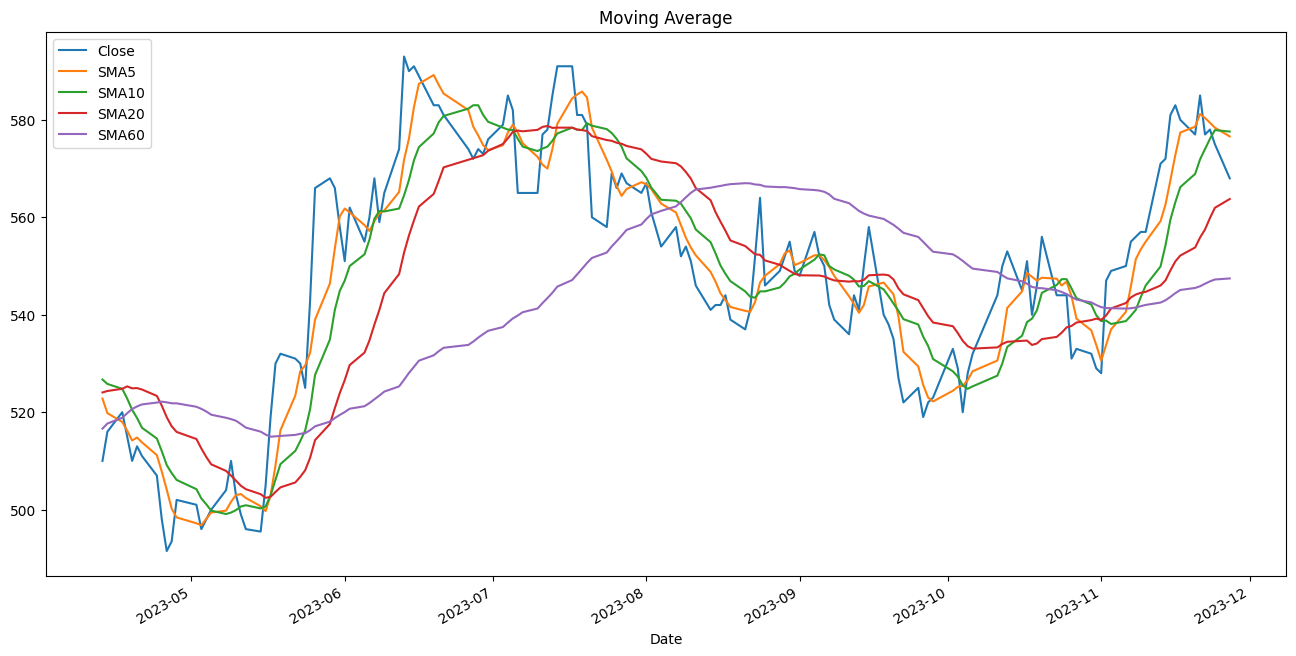

In [13]:
import pandas as pd
# importing time-series data
movingAverages = pd.read_csv('tsmc2023.csv', index_col='Date', parse_dates=True)
# Mathematical calculations 
import numpy as np
# updating our dataFrame to have only one column 'Close' as rest all columns are of no use for us at the moment using .to_frame() to convert pandas series into dataframe.
movingAverages = movingAverages['Close'].to_frame()
# calculating simple moving average using .rolling(window).mean() , with window size = 5
movingAverages['SMA5'] = movingAverages['Close'].rolling(5).mean()
# calculating simple moving average using .rolling(window).mean() , with window size = 10
movingAverages['SMA10'] = movingAverages['Close'].rolling(10).mean()
# calculating simple moving average using .rolling(window).mean() , with window size = 20
movingAverages['SMA20'] = movingAverages['Close'].rolling(20).mean()
# calculating simple moving average using .rolling(window).mean() , with window size = 60
movingAverages['SMA60'] = movingAverages['Close'].rolling(60).mean()
# removing all the NULL values using dropna() method
movingAverages.dropna(inplace=True)
# printing Dataframe
display(movingAverages)
# plotting graphs
import matplotlib.pyplot as plt
movingAverages[['Close', 'SMA5', 'SMA10', 'SMA20', 'SMA60']].plot(label='RELIANCE',figsize=(16,8))
plt.title("Moving Average")

C:\Users\User\AppData\Local\Temp\ipykernel_11560\264960443.py:33: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = axes[0].get_legend().legendHandles


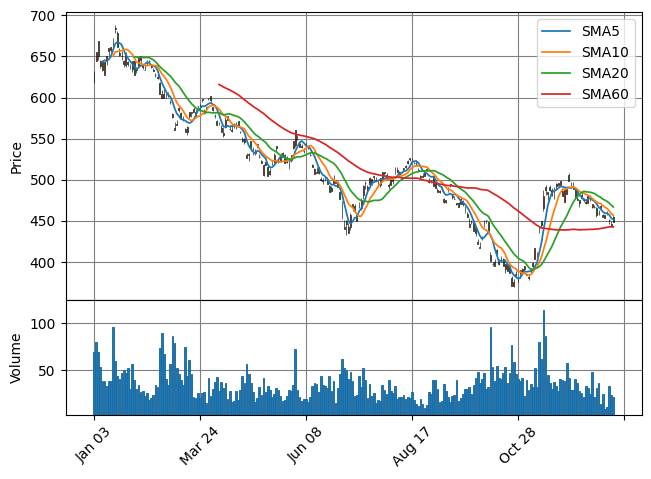

In [1]:
import talib
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

# 讀取歷史資料
movingAverages = pd.read_csv("tsmc2023.csv", index_col="Date", parse_dates=True)

# 計算均線
sma_5 = talib.SMA(movingAverages["Close"], timeperiod=5)
sma_10 = talib.SMA(movingAverages["Close"], timeperiod=10)
sma_20 = talib.SMA(movingAverages["Close"], timeperiod=20)
sma_60 = talib.SMA(movingAverages["Close"], timeperiod=60)

# 想要增加的圖表
added_plots = {"SMA5": mpf.make_addplot(sma_5),
               "SMA10": mpf.make_addplot(sma_10),
               "SMA20": mpf.make_addplot(sma_20),
               "SMA60": mpf.make_addplot(sma_60)
               }
# 設定圖表的顏色與網狀格格式
style = mpf.make_mpf_style(marketcolors=mpf.make_marketcolors(up="r", down="g"),
                           gridcolor="gray")

# 畫K線和均線圖
fig, axes = mpf.plot(movingAverages, type="candle", style=style,
                     addplot=list(added_plots.values()),
                     volume=True,
                     returnfig=True)

# 設定圖例
axes[0].legend([None] * (len(added_plots) + 2))
handles = axes[0].get_legend().legendHandles
axes[0].legend(handles=handles[2:], labels=list(added_plots.keys()))

axes[0].set_ylabel("Price")
axes[2].set_ylabel("Volume")

plt.show()

# 6. Present Candlestick Chart and Volume

In [12]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# import plotly.express as px
import pandas as pd
from datetime import datetime
df = pd.read_csv("./tsmc2023.csv")
fig = make_subplots(rows = 2, cols = 1, subplot_titles=("Candlestick Chart","Volume"))
fig.add_trace(go.Candlestick(
                x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'], name="CandlestickChart"), row=1, col=1)

fig.add_trace(go.Bar(x=df['Date'], y=df['Volume'], name="volume"), row=2, col=1)
fig.update_layout(xaxis_rangeslider_visible=False, title_text="TSMC")
fig.show()

# 7. Machine Learning Model usign Linear Regression to predict Next Day Value

[*********************100%%**********************]  1 of 1 completed


C:\Users\g1202\AppData\Local\Temp\ipykernel_10320\1345973169.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Next Close'] = data['Close'].shift(-1)


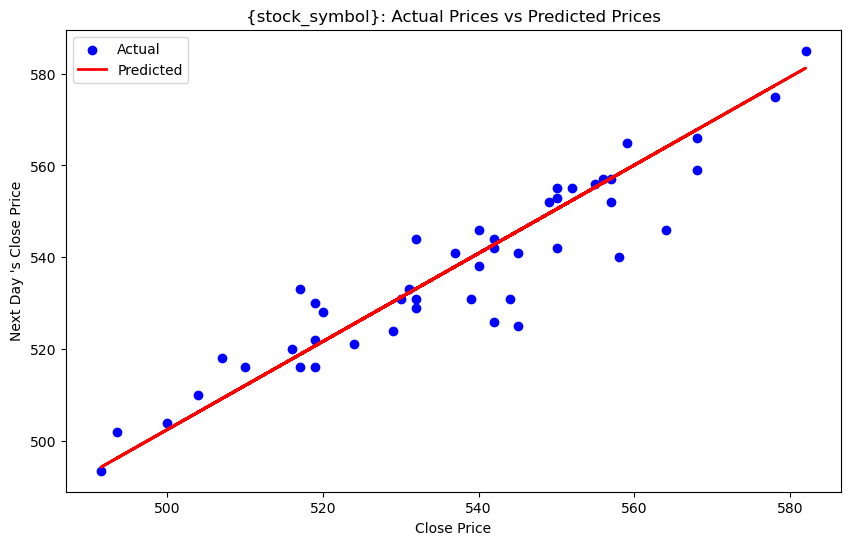

In [2]:
# import necessary Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # 載入正規方程法線性回歸模組
import matplotlib.pyplot as plt 

# Using yfinance to Download Financial Data 
import yfinance as yf
# Define the stock symbol and download data
stock_symbol = '2330.TW'
data = yf.download(stock_symbol, start = '2023-01-01')

# Extract the closing price
data = data[['close']] # 提領收盤價

# Create a new column for the next day's price (shifted -1 day)
data['Next close'] = data['close'].shift(-1) # 為第二天的價格建立一個新列（移動-1天）

# Drop the Last row (NaN) becasue there's no next day's data
data = data.dropna() # 因為沒有第二天的數據，刪除最後一行 

# Create features (X) and target (Y)  建立 特徵值 (X) 與 目標值 (Y)
x = data[['close']].values
y = data[['Next close']].values

# Split the data into training and testing sets  分成訓練集和測試集，以 20% 資料做為測試資料
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=250)
# X_train: 訓練集的特徵向量
# X_test: 測試集的特徵向量
# y_train: 訓練集的目標標籤
# y_test: 測試集的目標標籤
# test_size=0.2: 表示將數據分成測試集時，測試集的比例為總數據的 20%，而訓練集的比例為 80%。
# random_state=250: 設定隨機種子，確保分割的結果是可重複的。指定相同的 random_state 將獲得相同的分割結果。


# Create a linear regression model  進行正規方程法線性回歸
model = LinearRegression()  # 創建線性回歸模型
model.fit(x_train, y_train)  # 適配模型到數據

# Fit the model on the test data  根據測試資料擬合模型
y_pred = model.predict(x_test)  # 進行預測

# Visualize the actual price and predicted price 繪製原始數據和回歸線
plt.figure(figsize=(10,6))

# Adjust transparency and color
plt.scatter(x_test,y_test,color='blue',label='Actual')
plt.plot(x_test,y_pred,color='red',linewidth=2, label='Predicted')

# Adjust transparency and color
plt.title("TSMC: Actual Prices vs Predicted Prices")
plt.xlabel("Close Price")
plt.ylabel("Next Day \'s Close Price")
plt.legend()
plt.show()

Machine Learning Model usign Mean Squared Error and R-squared to predict Next Day Value

[*********************100%%**********************]  1 of 1 completed
Mean Squared Error: 31.84153688679018
R-squared: 0.9555518151869792


C:\Users\g1202\AppData\Local\Temp\ipykernel_10320\2556549589.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Next Close'] = data['Close'].shift(-1)


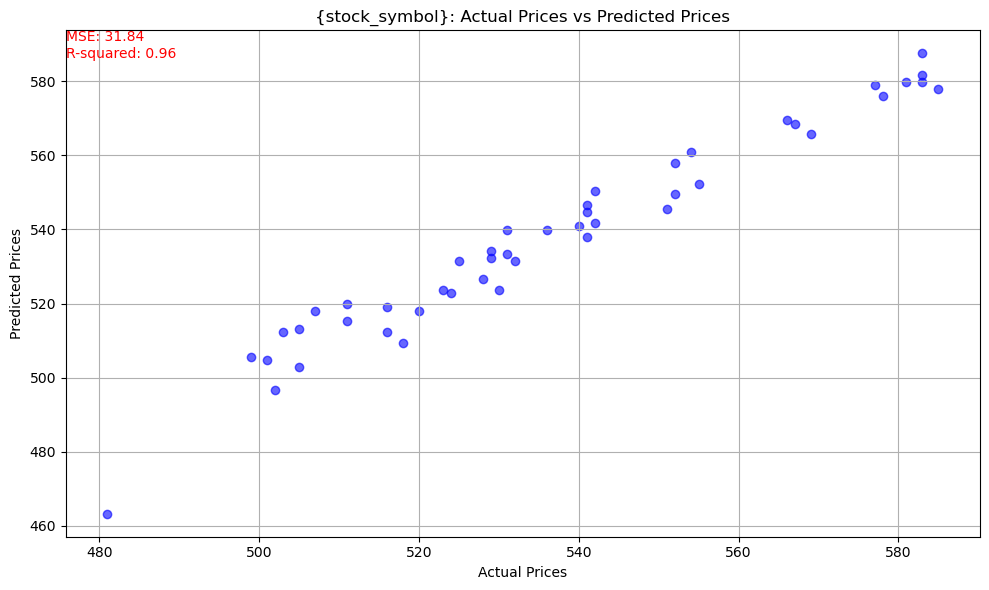

In [3]:
# import necessary Libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

# Using yfinance to Download Financial Data 
import yfinance as yf
# Define the stock symbol and download data
stock_symbol = '2330.TW'
data = yf.download(stock_symbol, start = '2023-01-01')

# Extract the closing price
data = data[['Close']]

# Create a new column for the next day's price (shifted -1 day)
data['Next Close'] = data['Close'].shift(-1)

# Drop the Last row (NaN) becasue there's no next day's data
data = data.dropna()

# Create features (X) and target (Y)
x = data[['Close']].values
y = data[['Next Close']].values

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=229)

# Create and train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
predictions = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r_squared = model.score(x_test,y_test)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

# Visualize the actual prices and predicted prices
plt.figure(figsize=(10,6))

# Add stock name to the title
plt.title("{stock_symbol}: Actual Prices vs Predicted Prices")
# Adjust transparency and color
plt.scatter(y_test, predictions, alpha=0.6, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

# display MSE and R-squared on plot
plt.text(plt.xlim()[0], plt.ylim()[1], f"MSE: {mse:.2f}\nR-squared: {r_squared:.2f}",
        ha='left', va='top', fontsize=10, color='red')

plt.grid()

plt.tight_layout()
# plt.legend()
plt.show()

# 8. Stock Market prediction using LSTM Model and RNN-LSTM model

In [10]:
# Using yfinance to Download Financial Data 
tsmc2022 = yf.download("2330.TW", start = '2022-01-01')
tsmc2022.to_csv('tsmc2022_2023.csv')

[*********************100%%**********************]  1 of 1 completed


Stock Market Prediction using LSTM Model

In [14]:
import yfinance as yf
import csv 
# Using yfinance to Download Financial Data 
tsmc2022 = yf.download("2330.TW", start = '2022-01-01', end = '2022-12-31')
tsmc2022.to_csv('tsmc2022.csv')

[*********************100%%**********************]  1 of 1 completed


In [16]:
# Using yfinance to Download Financial Data 
tsmc2022 = yf.download("2330.TW", start = '2023-01-01')
tsmc2022.to_csv('tsmc2023.csv')

[*********************100%%**********************]  1 of 1 completed


In [17]:
import pandas as pd
df = pd.read_csv("./tsmc2022.csv", index_col="Date", parse_dates=True)
print(df)

             Open   High    Low  Close   Adj Close    Volume
Date                                                        
2022-01-03  619.0  632.0  618.0  631.0  607.793213  69089158
2022-01-04  645.0  656.0  644.0  656.0  631.873779  79434666
2022-01-05  669.0  669.0  646.0  650.0  626.094421  69593809
2022-01-06  638.0  646.0  636.0  644.0  620.315063  53210211
2022-01-07  643.0  646.0  632.0  634.0  610.682861  38249908
...           ...    ...    ...    ...         ...       ...
2022-12-26  454.0  457.0  453.5  456.5  449.421234   8793306
2022-12-27  458.0  462.5  457.0  457.0  449.913513  10264001
2022-12-28  451.0  452.0  446.0  451.0  444.006531  32578949
2022-12-29  444.0  449.5  442.5  446.0  439.084076  23020759
2022-12-30  455.0  456.5  448.5  448.5  441.545288  21683478

[246 rows x 6 columns]


In [18]:
import numpy as np
def create_data(dataset, l_b=1):
  # 建立 LSTM 資料串列 
  X_data, Y_data = [],[]
  for i in range(len(dataset)-l_b):
    X_data.append(dataset[i:(i+l_b), 0:2])
    Y_data.append(dataset[i+l_b, 0])
  return np.array(X_data), np.array(Y_data)

In [20]:
from sklearn.preprocessing import MinMaxScaler
X_train_set = df.iloc[:,4:5].values
# 建立資料標準化
sc = MinMaxScaler()
X_train_set = sc.fit_transform(X_train_set)
# 設定特徵資料個數 
look_back = 60
X_train, Y_train = create_data(X_train_set, look_back)
print(X_train_set.shape)
print(X_train.shape, Y_train.shape)
print(X_train)
print(Y_train)

(246, 1)
(186, 60, 1) (186,)
[[[0.83005297]
  [0.91175846]
  [0.89214907]
  ...
  [0.66619322]
  [0.62678039]
  [0.63006467]]

 [[0.91175846]
  [0.89214907]
  [0.87253968]
  ...
  [0.62678039]
  [0.63006467]
  [0.60050489]]

 [[0.89214907]
  [0.87253968]
  [0.83985756]
  ...
  [0.63006467]
  [0.60050489]
  [0.59722061]]

 ...

 [[0.19263382]
  [0.24577409]
  [0.26570179]
  ...
  [0.2876855 ]
  [0.292696  ]
  [0.2943663 ]]

 [[0.24577409]
  [0.26570179]
  [0.22252515]
  ...
  [0.292696  ]
  [0.2943663 ]
  [0.27432388]]

 [[0.26570179]
  [0.22252515]
  [0.10129873]
  ...
  [0.2943663 ]
  [0.27432388]
  [0.25762197]]]
[0.60050489 0.59722061 0.64977119 0.64977119 0.61364264 0.61035836
 0.6234959  0.63991793 0.6234959  0.60050489 0.56437655 0.56109227
 0.49540405 0.51182618 0.53481719 0.51182618 0.52167923 0.54795473
 0.50197292 0.47569763 0.46912886 0.47898212 0.42643154 0.44613806
 0.47569763 0.50854148 0.53481719 0.48226661 0.50854148 0.50197292
 0.47569763 0.48883538 0.45599132 0.508541

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
# 建立 LSTM 層 及 輸出層 模型 
model = Sequential()
model.add(LSTM(32, input_shape=(X_train.shape[1],1), return_sequences= True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()
# 定義 Loss 損失函數、Optimizer 最佳化方法 和 metrics 評估準確率方法
model.compile(loss="MSE", optimizer="adam", metrics=["accuracy"])
#進行訓練
model.fit(X_train, Y_train, epochs=50, batch_size=64)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 32)            4352      
                                                                 
 dropout (Dropout)           (None, 60, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 12705 (49.63 KB)
Trainable params: 12705 (49.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Epoch 1/50


3/3 

In [27]:
# 建立比對資料 
import pandas as pd
df = pd.read_csv("./tsmc2023.csv", index_col="Date", parse_dates=True)
X_test_set = df.iloc[:,4:5].values
X_test_set = sc.fit_transform(X_test_set)
X_test, Y_test = create_data(X_test_set, look_back)

X_test_predict = model.predict(X_test)

X_test_predict_price = sc.inverse_transform(X_test_predict)
Y_test_price = sc.inverse_transform(Y_test.reshape(155,1))

5/5 [==============================] - 0s 8ms/step


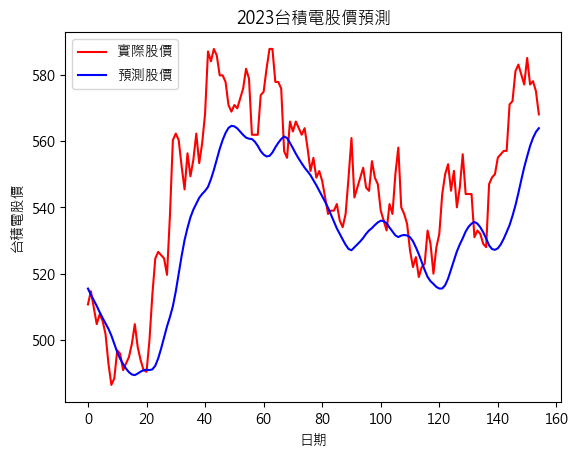

In [29]:
import matplotlib.pyplot as plt
plt.rc("font", family="Microsoft JhengHei")  # 微軟正黑體
# plt.rcParams['font.family']=['Arial Unicode MS']  # mac
plt.plot(Y_test_price, color="red", label="實際股價")
plt.plot(X_test_predict_price, color="blue", label="預測股價")
plt.title("2023台積電股價預測")
plt.xlabel("日期")
plt.ylabel("台積電股價")
plt.legend()
plt.show()

Stock Market Prediction using RNN-LSTM model

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
# 取得股票收盤資料
df = pd.read_csv("./tsmc2022.csv", index_col="date", parse_dates=True)
dfprice = pd.DataFrame(df['close'])
# 設定特徵資料個數
sequence_length = 10
# 將資料標準化
scaler = MinMaxScaler()
dfprice = scaler.fit_transform(dfprice)
# 建立 RNN 資料串列
data = []
for i in range(len(dfprice) - sequence_length):
    data.append(dfprice[i: i + sequence_length + 1])
# 將 RNN 資料串列轉為 Numpy 陣列
reshaped_data = np.array(data)
# 建立特徵陣列及標籤陣列
x = reshaped_data[:, :-1]
y = reshaped_data[:, -1]
# 計算訓練資料數量
split_boundary = int(reshaped_data.shape[0] * 0.8) 
# 建立訓練及測試的特真資料及標籤資料
train_x = x[: split_boundary]
test_x = x[split_boundary:]
train_y = y[: split_boundary]
test_y = y[split_boundary:]
# 建立 ＬＳＴＭ層 及 輸出層 模型
model = Sequential()
model.add(LSTM(input_shape=(10,1), units=256, unroll=False))
model.add(Dense(units=1))
# 定義 Loss 損失函式、Optimizer最佳化方法和metircs評估準確率方法
model.compile(loss="mse", optimizer="adam", metrics=['accuracy'])
# 進行訓練
model.fit(train_x, train_y, batch_size=100, 
          epochs=100, validation_split=0.2, verbose=2)
# 儲存訓練完成的模型
model.save('stock_model.h5')

Epoch 1/100
2/2 - 2s - loss: 0.2406 - accuracy: 0.0000e+00 - val_loss: 0.0094 - val_accuracy: 0.0263 - 2s/epoch - 1s/step
Epoch 2/100
2/2 - 0s - loss: 0.0521 - accuracy: 0.0000e+00 - val_loss: 0.0161 - val_accuracy: 0.0263 - 54ms/epoch - 27ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0195 - accuracy: 0.0067 - val_loss: 0.0414 - val_accuracy: 0.0263 - 49ms/epoch - 24ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0418 - accuracy: 0.0067 - val_loss: 0.0160 - val_accuracy: 0.0263 - 51ms/epoch - 26ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0065 - accuracy: 0.0067 - val_loss: 0.0042 - val_accuracy: 0.0263 - 49ms/epoch - 24ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0079 - accuracy: 0.0067 - val_loss: 0.0030 - val_accuracy: 0.0263 - 50ms/epoch - 25ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0189 - accuracy: 0.0067 - val_loss: 0.0031 - val_accuracy: 0.0263 - 49ms/epoch - 25ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0195 - accuracy: 0.0067 - val_loss: 0.0031 - val_accuracy: 0.0263 - 50ms/epoch - 25ms/step
Epoch 9/100
2/2 - 0s

c:\Users\User\miniconda3\envs\stockProj\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 4ms/step


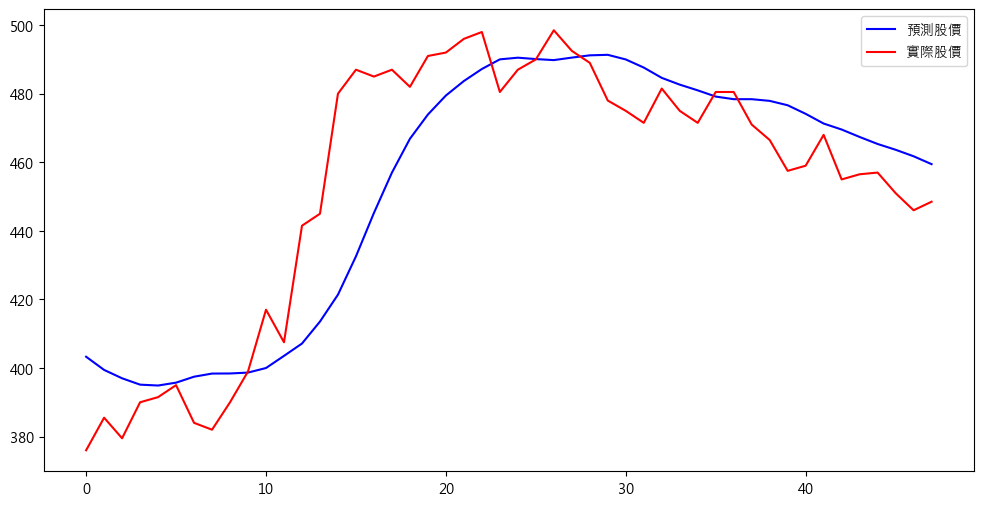

In [31]:
# 預測收盤股價
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model

df = pd.read_csv('./tsmc2022.csv', encoding='utf-8')
dfprice = pd.DataFrame(df['close'])
sequence_length = 10
scaler = MinMaxScaler()
dfprice = scaler.fit_transform(dfprice)
data = []
for i in range(len(dfprice) - sequence_length):
    data.append(dfprice[i: i + sequence_length + 1])
reshaped_data = np.array(data)
x = reshaped_data[:, :-1]
y = reshaped_data[:, -1]
split_boundary = int(reshaped_data.shape[0] * 0.8) 
train_x = x[: split_boundary]
test_x = x[split_boundary:]
train_y = y[: split_boundary]
test_y = y[split_boundary:]
# 載入模型
model = load_model('stock_model.h5')
# 進行預測
predict = model.predict(test_x)
# 預測值是經標準化後的數值，將預測以 inverse_transform 方法還原為原始值
predict = scaler.inverse_transform(predict)
# 將真實資料還原為原始資料
test_y = scaler.inverse_transform(test_y)
plt.rcParams['font.family']=['Arial Unicode MS'] ## mac
# plt.rc("font", family="Microsoft JhengHei")  # 微軟正黑體
# 繪出股價圖表
plt.figure(figsize=(12,6)) # 設定繪圖區尺寸
# 以藍色繪製真實值圖形
plt.plot(predict, 'b-')
# 以紅色繪製真實值圖形
plt.plot(test_y, 'r-')
# 設定圖例及顯示圖形
plt.legend(['預測股價', '實際股價'])
plt.show()